## Import required libraries


In [1]:
# import the data analysis libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# for splitting data into random train and test subsets
from sklearn.model_selection import train_test_split

# for machine learning
from sklearn.linear_model import LinearRegression

# accuracy metrics for the regression problem
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

# set the background of the images
sns.set_style('darkgrid')

## Load data
https://www.kaggle.com/datasets/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

In [2]:
df = pd.read_csv("audi.csv")

display(df.head(10))
print('Shape of the dataframe =', df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4


Shape of the dataframe = (10668, 8)


In [3]:
# check for missing values, data types of the columns
display(df.info())

## statistics of the numerical variables
# display(df.describe())

## statistics of the object variables
#display(df.describe(include='object'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


None

In [4]:
# print the name of the unique models
print("models : ", df['model'].unique())

print(".............................................................................................")
print(".............................................................................................")

# print the unique transmission systems 
print("transmission : ", df['transmission'].unique())

print(".............................................................................................")
print(".............................................................................................")

# print the unique fuelTypes 
print("fuelType : ", df['fuelType'].unique())

print("..............................................................................................")
print(".............................................................................................")

# column names
display(df.columns)

models :  [' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
.............................................................................................
.............................................................................................
transmission :  ['Manual' 'Automatic' 'Semi-Auto']
.............................................................................................
.............................................................................................
fuelType :  ['Petrol' 'Diesel' 'Hybrid']
..............................................................................................
.............................................................................................


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

## Saperating feature variables and target variables

In [5]:
# separate the training features
X = df.drop(['price'], axis=1)
print( X.shape)

# seprate the target variable
target = df[['price']]
print(target.shape)


(10668, 7)
(10668, 1)


### Data Transformation

In [6]:
# numeric features
numeric_cols = X.select_dtypes(include='number').columns
print(numeric_cols)

Index(['year', 'mileage', 'mpg', 'engineSize'], dtype='object')


In [7]:
## Setting numeric columns (mileage, year, mpg, engineSize) as features 
#features = ['year', 'mileage', 'mpg', 'engineSize']

##Setting price as target
#target = ['price']

#X = df[features] 
##display(X.head())

#target = df[target]
##display(y.head())

#print("Features Shape is: ", X.shape, "\nTarget shape is: ", target.shape)

## I used this cell to check the performance of the model using only numeric columns.

 ## Data Processing : Label Encoding

In [8]:
#LE = LabelEncoder()

#X["model"] = LE.fit_transform(X["model"])

#X["transmission"] = LE.fit_transform(X["transmission"])

#X["fuelType"] = LE.fit_transform(X["fuelType"])

#display(X.head(10))
#print('Shape of the new dataframe =', X.shape)

 ## Data Processing : OneHot Encoding

In [9]:
# To see maximum number of columns
#pd.options.display.max_columns =40

X = pd.get_dummies(X, drop_first=True)
display(X.head(10))
print(X.shape)

,year,mileage,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,15735,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,36203,64.2,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,29946,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,25952,67.3,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,1998,49.6,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,2016,32260,58.9,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2016,76788,61.4,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,2016,75185,70.6,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,2015,46112,60.1,1.4,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,2016,22451,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


(10668, 33)


### Train dataset and Test dataset separation

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.8, random_state=11)

print("Shape of X_train :", X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (8534, 33)
Shape of y_train : (8534, 1)
Shape of X_test : (2134, 33)
Shape of y_test : (2134, 1)


### Model Training: Linear Regression

In [11]:
model = LinearRegression()
model = model.fit(X_train, y_train)

### Coefficients and y-intercept C

In [12]:
print(X.columns)

Index(['year', 'mileage', 'mpg', 'engineSize', 'model_ A2', 'model_ A3',
       'model_ A4', 'model_ A5', 'model_ A6', 'model_ A7', 'model_ A8',
       'model_ Q2', 'model_ Q3', 'model_ Q5', 'model_ Q7', 'model_ Q8',
       'model_ R8', 'model_ RS3', 'model_ RS4', 'model_ RS5', 'model_ RS6',
       'model_ RS7', 'model_ S3', 'model_ S4', 'model_ S5', 'model_ S8',
       'model_ SQ5', 'model_ SQ7', 'model_ TT', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Hybrid', 'fuelType_Petrol'],
      dtype='object')


In [13]:
coefficients = model.coef_
#print("coefficients = ", coefficients)

# y-intercept
c = model.intercept_
print("y-intercept c = ", c)

y-intercept c =  [-4066263.5592805]


In [16]:
coef_df = pd.DataFrame({'num_features' : X.columns, 'coefficients' : np.squeeze(coefficients)})

display(coef_df)

,num_features,coefficients
0,year,2027.320856
1,mileage,-0.073184
2,mpg,-184.511659
3,engineSize,4501.805688
4,model_ A2,22295.596403
5,model_ A3,1088.623933
6,model_ A4,1260.878229
7,model_ A5,2190.840686
8,model_ A6,3194.390479
9,model_ A7,3977.125984


- A positive coefficient indicates that as the value of feature variable increases, the value of target variable also increases.
- A negative coefficient indicates that as the value of feature variable increases, the value of target variable decreases.

### Price Prediction

In [17]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[[28852.69093912]
 [34912.50071473]
 [19349.37974525]
 ...
 [16040.8374673 ]
 [17787.20523001]
 [24613.1929463 ]]
      price
9618  33990
5742  32790
811   18695
3412  12802
7686  15990
...     ...
3326  57000
8370  20000
5997  13745
3912  20990
7183  17400

[2134 rows x 1 columns]


### Checking Prediction Error using MAE, MAPE, MSE, RMSE, & R2 as KPIs

In [18]:
# mean absolute error: lower is better
MAE = np.round(mean_absolute_error(y_test, y_pred),2)
print('MAE =', MAE)

# MAPE: Mean Absolute Percentage Error: lower is better
MAPE = np.round(mean_absolute_percentage_error(y_test, y_pred), 2)
print('MAPE =', MAPE)

# mean squared error: lower is better
MSE = np.round(mean_squared_error(y_test, y_pred, squared = True),2)
print('MSE =', MSE)

# root mean squared error: lower is better
RMSE = np.round(mean_squared_error(y_test, y_pred, squared = False),2)
print('RMSE =', RMSE)

# coefficient of determination == r_squared: greater is better. Max =1, min=-
r2 = np.round(r2_score(y_test, y_pred), 2)
print('r2 =', r2)

MAE = 2654.32
MAPE = 0.14
MSE = 18780732.81
RMSE = 4333.67
r2 = 0.84


## Observations


#### After taking - 'year', 'mileage', 'mpg', 'engineSize' as feature variables, we have

MAE = 3409.13

MAPE = 0.18

MSE = 29334262.3

RMSE = 5416.11

r2 = 0.75

#### After Label Encoding, we have

MAE = 3393.82  (lower is better) 

MAPE = 0.18  (lower is better) 

MSE = 27784546.18   (lower is better) 

RMSE = 5271.1  (lower is better) 

r2 = 0.77  (greater is better) 


#### After OneHot Encoding, we have

MAE = 2654.32   (lower is better) 

MAPE = 0.14  (lower is better) 

MSE = 18780732.81   (lower is better) 

RMSE = 4333.67    (lower is better) 

r2 = 0.84  (greater is better)

##### We can clearly see from the results above that, the prediction is better when we perform OneHot encoding.

In [19]:
y_test["predicted_price"] = y_pred
y_test["x"] = np.arange(0, y_test.shape[0], 1)
display(y_test.head())

,price,predicted_price,x
9618,33990,28852.690939,0
5742,32790,34912.500715,1
811,18695,19349.379745,2
3412,12802,15828.676204,3
7686,15990,16782.002327,4


## Comparing the actual price and the predicted price through visualization


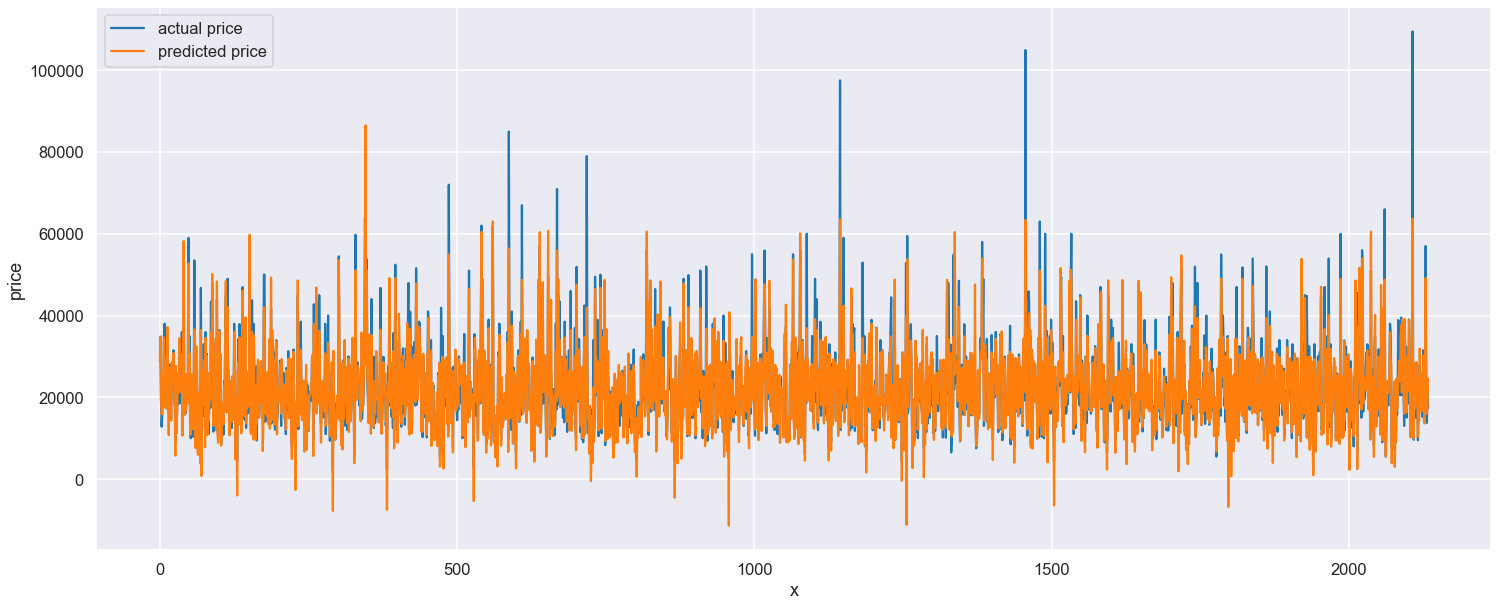

In [20]:
plt.figure(figsize=(25,10))

sns.lineplot(x='x', y='price', data=y_test, label='actual price')
sns.lineplot(x='x', y='predicted_price', data=y_test, label='predicted price')
plt.show()

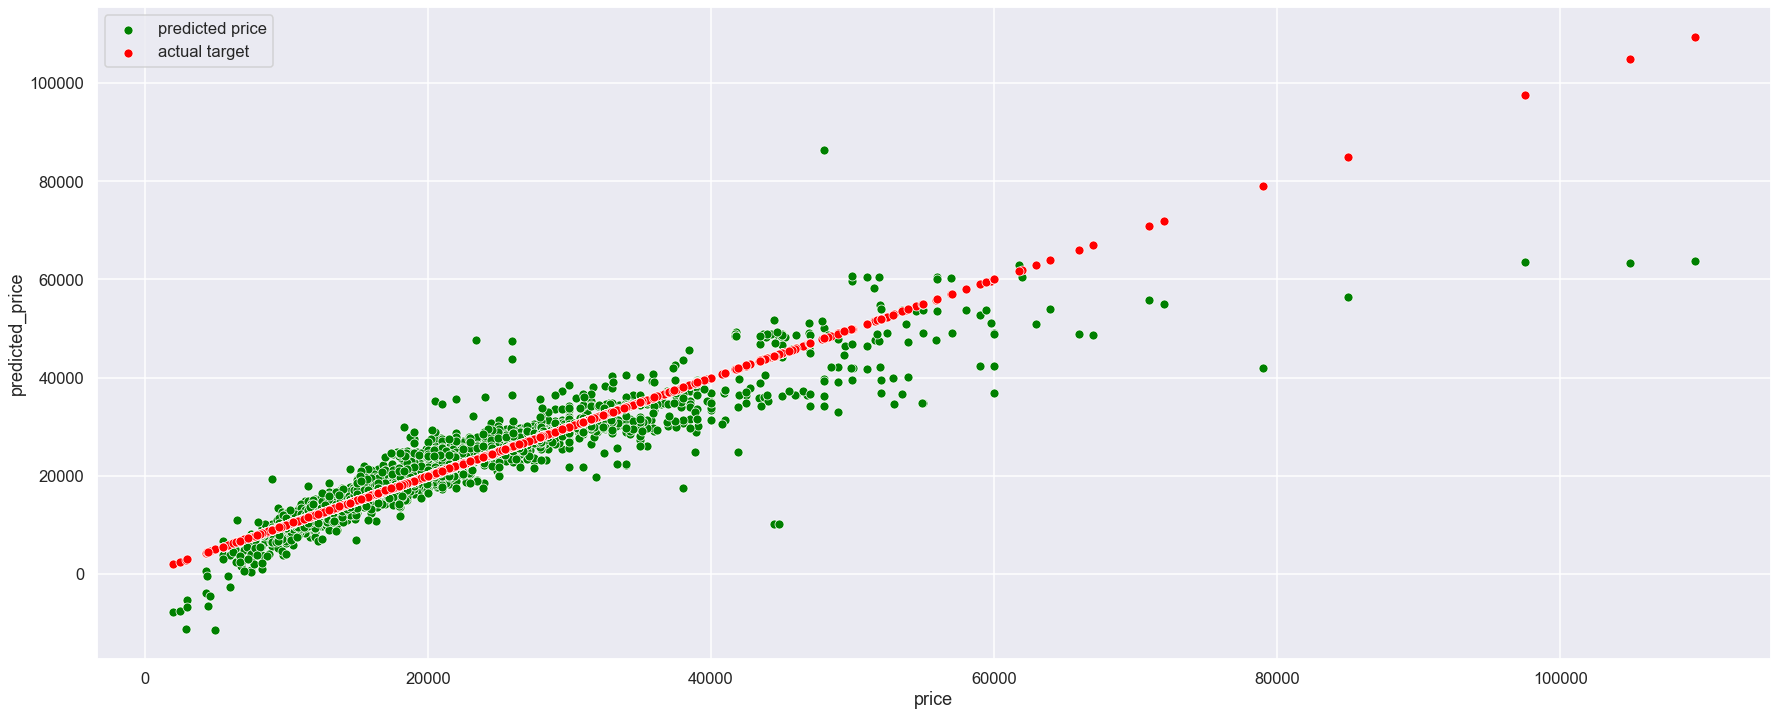

In [22]:
# Scatter Plot
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='predicted_price', data=y_test, color='green', label='predicted price')

# where actual price and predicted price equal
sns.scatterplot(x='price', y='price', data=y_test, color='red', label='actual target')
plt.show()

From the above visualizations, we can see that when car price is less than 40000 USD,  predicted  prices are  close to  the actual prices. When car prices are greater than 40000 USD, predicted prices went away from the actual prices. That means, the model performs better for the car price below 40,000 USD.

Though KPI's indicate the model is quite good, it has some flaws too.

● Some values are less than zero, which is impossible.

● There are too many fetures.


So, this model is not good enough for this dataset to prediction almost accurately.

###### Future Work : ######
We can improve the model using Cross Validation, Grid Search, Redicing Feature number or introducing new features from existing features, or using differnt Algorithm.
